---

## Part I: <span style="color:blue">Descriptive Statistics</span>

### Step 1: <span style="color:green">Import Libraries</span> 

In [88]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

---------------------------------------------------------------------------


### Step 2: <span style="color:green">Descriptive Statistics</span> 
Southern Water Corp data has been split into two files.
The first file, titled DF_Raw_Data contains all the 'raw' Pump Data.
The second file, titled DF_Rolling_Stdev contains the Rolling Standard Deviation Data.

- Import each of the two data sources and store them into their individual DataFrames. 
- Print descriptive statistics for each of the DataFrames using **.describe()** and **.info()**

In [89]:
dataframe_raw = pd.read_csv("DF_Raw_Data.csv")

dataframe_raw.describe()
dataframe_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2453 entries, 0 to 2452
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data Source              2453 non-null   object 
 1   TIMEFRAME (DD/MM/YYYY)   2453 non-null   object 
 2   Volumetric Flow Meter 1  2453 non-null   float64
 3   Volumetric Flow Meter 2  2453 non-null   float64
 4   Pump Speed (RPM)         2453 non-null   int64  
 5   Pump Torque              2453 non-null   int64  
 6   Ambient Temperature      2453 non-null   int64  
 7   Horse Power              2453 non-null   float64
 8   Pump Efficiency          2453 non-null   float64
 9   PUMP FAILURE (1 or 0)    2453 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 191.8+ KB


In [92]:
dataframe_raw.head()

,Data Source,TIMEFRAME (DD/MM/YYYY),Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
0,Raw,9/12/2014 0:00,41.30,41.16,98,207,54,3.86,74.84,0
1,Raw,9/12/2014 0:01,42.40,41.39,92,212,46,3.71,75.25,0
2,Raw,9/12/2014 0:02,41.43,41.15,80,207,55,3.15,74.82,0
3,Raw,9/12/2014 0:03,42.21,40.93,83,190,49,3.00,74.42,0
4,Raw,9/12/2014 0:04,40.51,43.32,90,195,50,3.34,78.76,0


In [90]:
dataframe_stdev = pd.read_csv("DF_Rolling_Stdev.csv")
dataframe_stdev.describe()
dataframe_stdev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data Source              2452 non-null   object 
 1   TIMEFRAME (DD/MM/YYYY)   2452 non-null   object 
 2   Volumetric Flow Meter 1  2452 non-null   float64
 3   Volumetric Flow Meter 2  2452 non-null   float64
 4   Pump Speed (RPM)         2452 non-null   float64
 5   Pump Torque              2452 non-null   float64
 6   Ambient Temperature      2452 non-null   float64
 7   Horse Power              2452 non-null   float64
 8   Pump Efficiency          2452 non-null   float64
 9   PUMP FAILURE (1 or 0)    2452 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 191.7+ KB


In [91]:
dataframe_stdev.head()

,Data Source,TIMEFRAME (DD/MM/YYYY),Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
0,Rolling Stdev (30 Minute),9/12/2014 0:00,1.04,0.96,5.54,11.70,3.40,0.32,1.74,0
1,Rolling Stdev (30 Minute),9/12/2014 0:01,1.06,1.01,5.49,11.73,3.36,0.31,1.83,0
2,Rolling Stdev (30 Minute),9/12/2014 0:02,1.06,1.03,5.62,11.94,3.40,0.31,1.87,0
3,Rolling Stdev (30 Minute),9/12/2014 0:03,1.06,1.05,5.61,12.10,3.30,0.31,1.90,0
4,Rolling Stdev (30 Minute),9/12/2014 0:04,1.07,1.03,5.61,12.31,3.36,0.30,1.88,0



<span style="color:blue">Dataframe_raw has much higher mean and standard deviation than dataframe_stvdev for Volumetric Flow Meter 1,Volumetric Flow Meter 2, Pump Speed, Pump Torque, Ambient Temperature, Horse Power, Pump Efficiency. 

<span style="color:blue">However, dataframe_raw and dataframe_stvdev have approximately similar mean and standard deviation for PUMP FAILURE.

---------------------------------------------------------------------------

### Step 3: <span style="color:green">Create a Boxplot</span> 

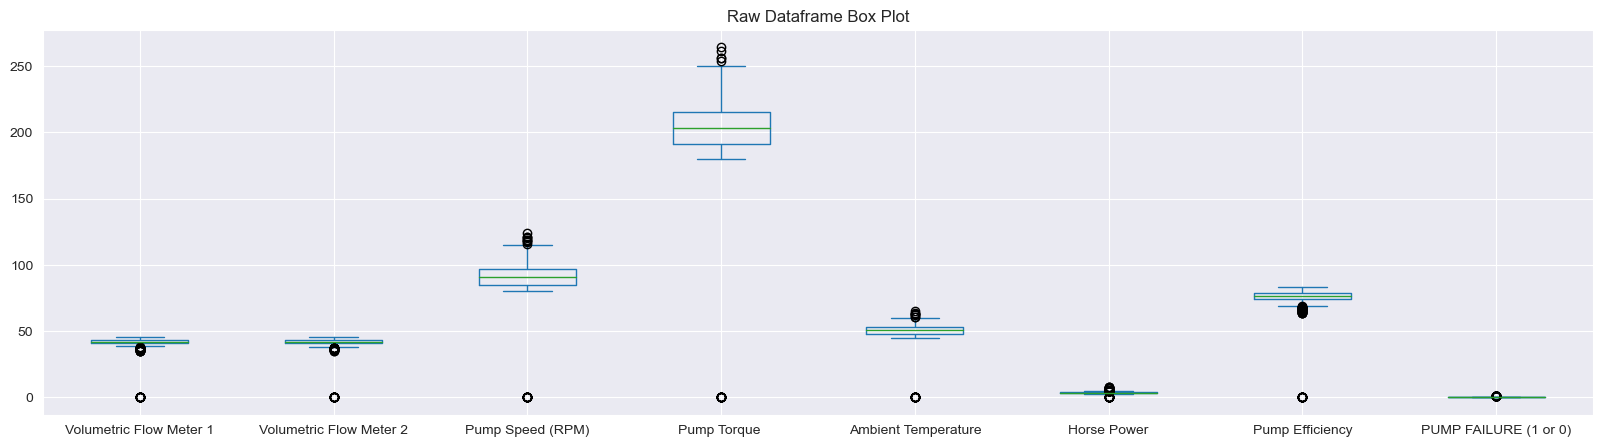

In [62]:
# Raw Dataframe Box Plot

dataframe_raw.plot(kind='box')
plt.title("Raw Dataframe Box Plot")
plt.show()

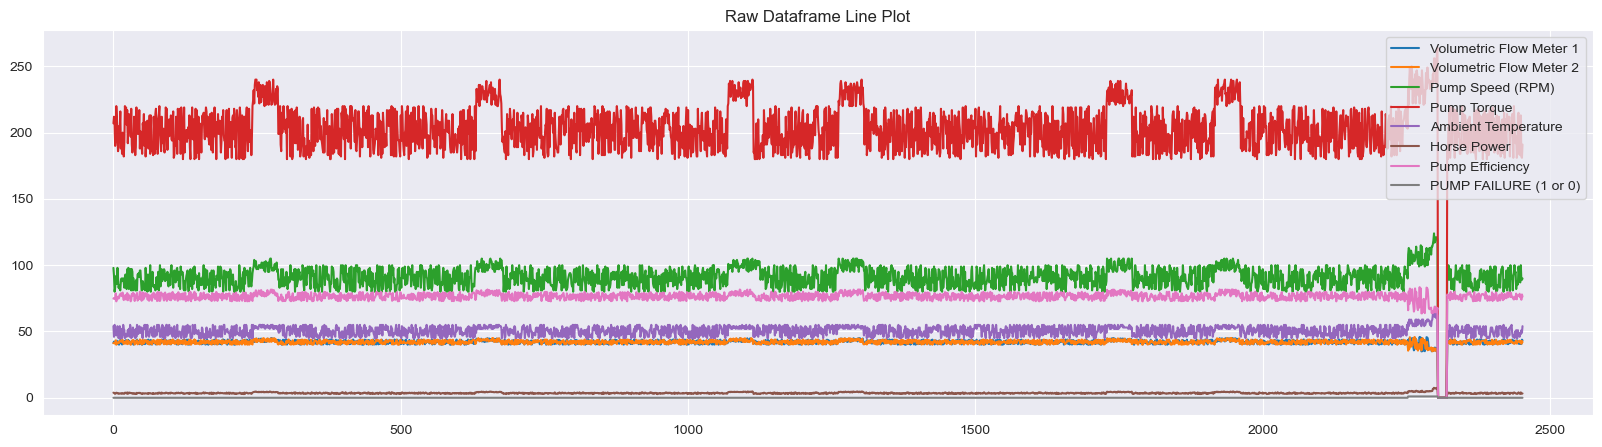

In [63]:
# Raw Dataframe Line Plot
dataframe_raw.plot(kind='line')

plt.title("Raw Dataframe Line Plot")
plt.show()

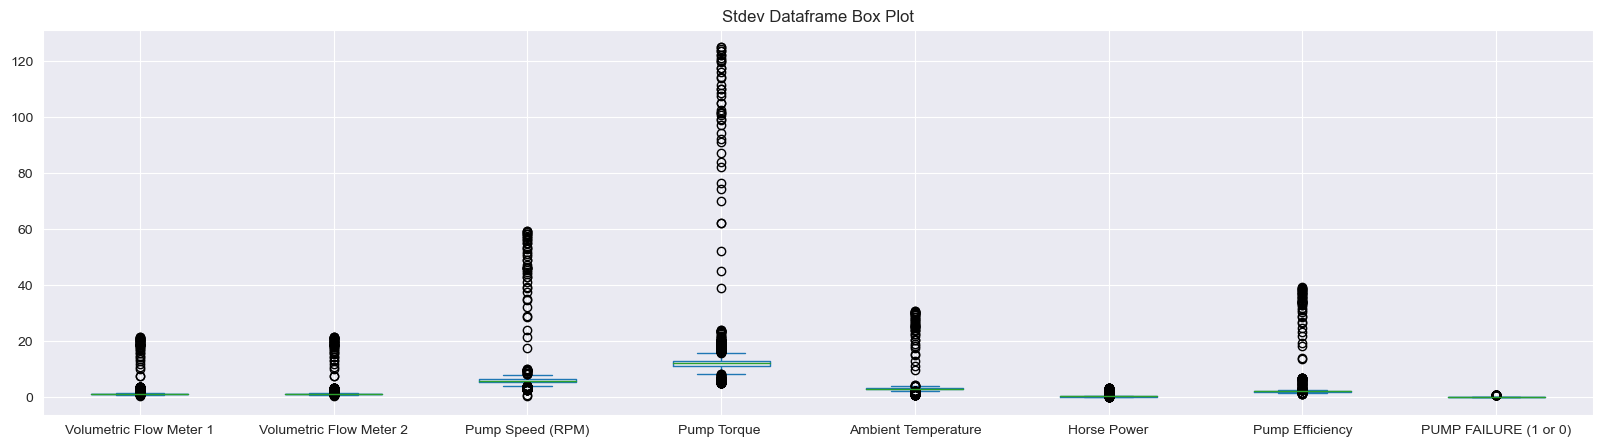

In [64]:
# Stdev Dataframe Box Plot
dataframe_stdev.plot(kind='box')
plt.title("Stdev Dataframe Box Plot")
plt.show()

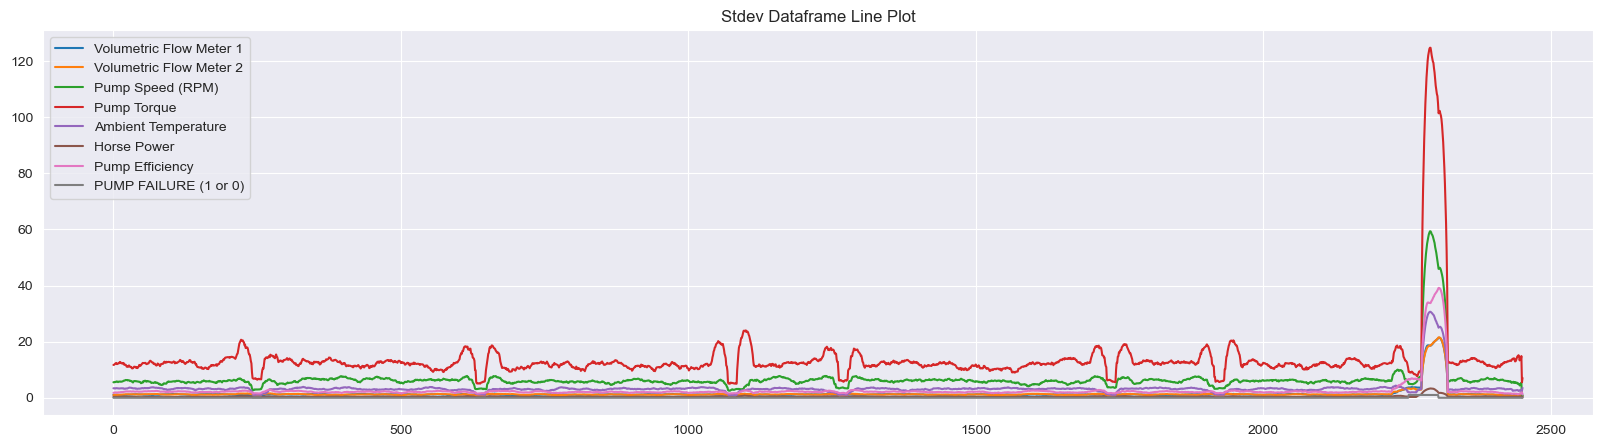

In [65]:
# Stdev Dataframe Line Plot
dataframe_stdev.plot(kind='line')

plt.title("Stdev Dataframe Line Plot")
plt.show()

<span style="color:blue">- For dataframe_raw box plot, we can see that we have outliers for every data set at 0, and pump failure(1 or 0) box plot looks inaccuracy since the data is only 1 or 0. 
    
<span style="color:blue">- For dataframe_stdev box plot, we can see many outliers spread along the box plot, and pump failure (1 or 0) box plot looks inaccuracy.
    
<span style="color:blue">- For dataframe_stdev and dataframe_raw line plots, we can see the abnormal activity (a spike)

---------------------------------------------------------------------------

### Step 4: <span style="color:green">Filtered DataFrames with Box Plots</span> 

We noted the datasets we have contain a Pump Failure (1 or 0) Variable that indicate whether the pump is failing (1) or whether the pump is behaving normally (0).  
    
It is very likely we will see differences in the overall populations of Pre-Failure vs. Post Failure.
To visualise this difference, we will separate your datasets, filtering for when the Pump Failure = 0 or when the Pump Failure = 1, and see what trends emerge. 
    
This will require to <b> SUBSET </b> the dataframe using *boolean filters*.

Using the dataframe_raw dataset, we will create two boxplots specifically for when the pump has failed and when the pump is working normally. 


In [67]:
# dataframe_raw
failling_raw = dataframe_raw['PUMP FAILURE (1 or 0)']== 1
normal_raw = dataframe_raw['PUMP FAILURE (1 or 0)']== 0
dataframe_1_raw = dataframe_raw[failling_raw]
dataframe_0_raw = dataframe_raw[normal_raw]


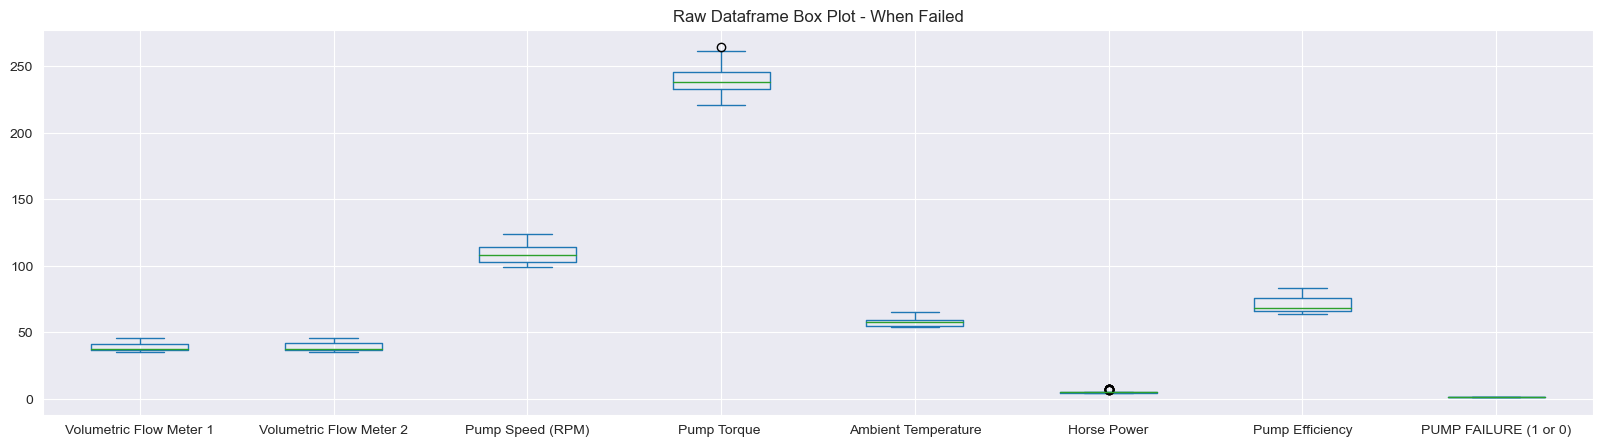

In [68]:
# when failing
dataframe_1_raw.plot(kind='box')
plt.title("Raw Dataframe Box Plot - When Failed")
plt.show()

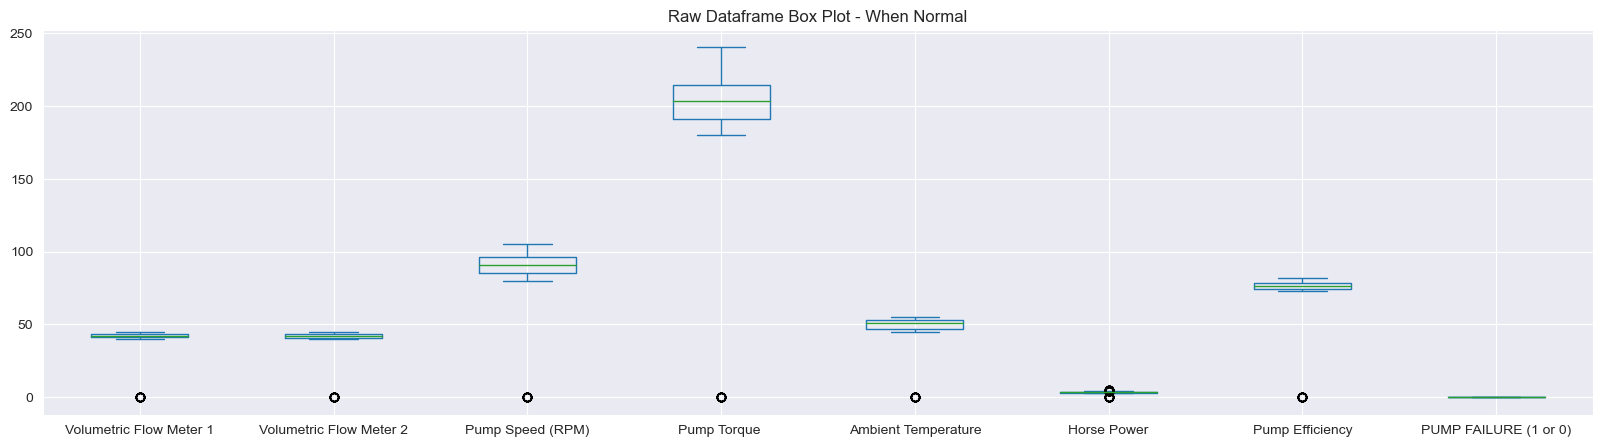

In [69]:
# when normal
dataframe_0_raw.plot(kind='box')
plt.title("Raw Dataframe Box Plot - When Normal")
plt.show()

In [70]:
# dataframe_stdev
failling_stdev = dataframe_stdev['PUMP FAILURE (1 or 0)']== 1
normal_stdev = dataframe_stdev['PUMP FAILURE (1 or 0)']== 0
dataframe_1_stdev = dataframe_stdev[failling_stdev]
dataframe_0_stdev = dataframe_stdev[normal_stdev]

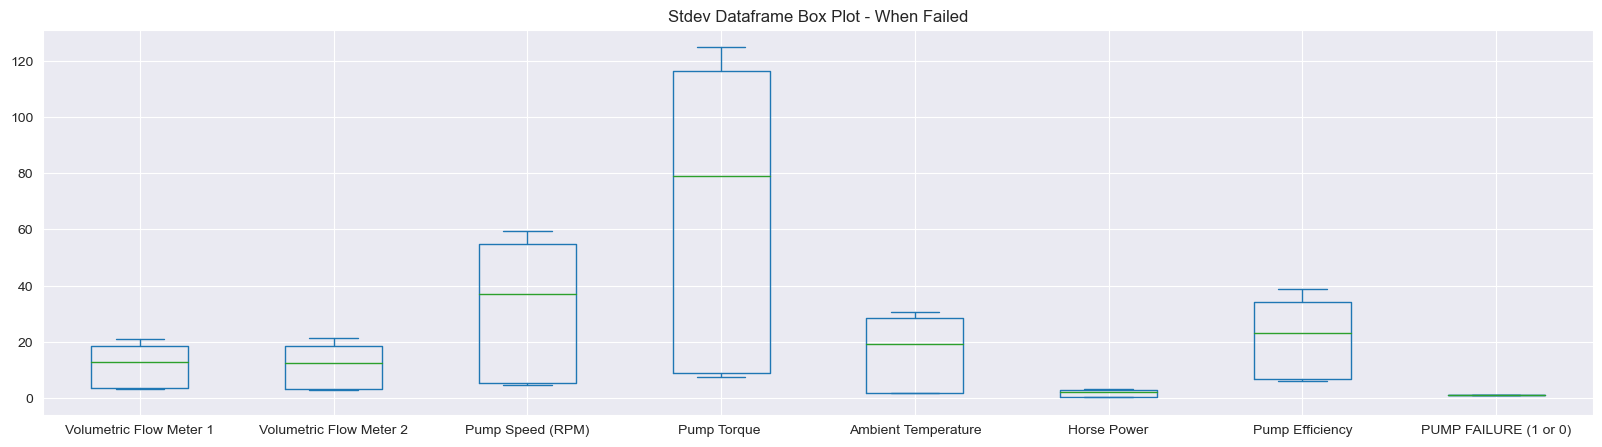

In [71]:
# when failing
dataframe_1_stdev.plot(kind='box')
plt.title("Stdev Dataframe Box Plot - When Failed")
plt.show()

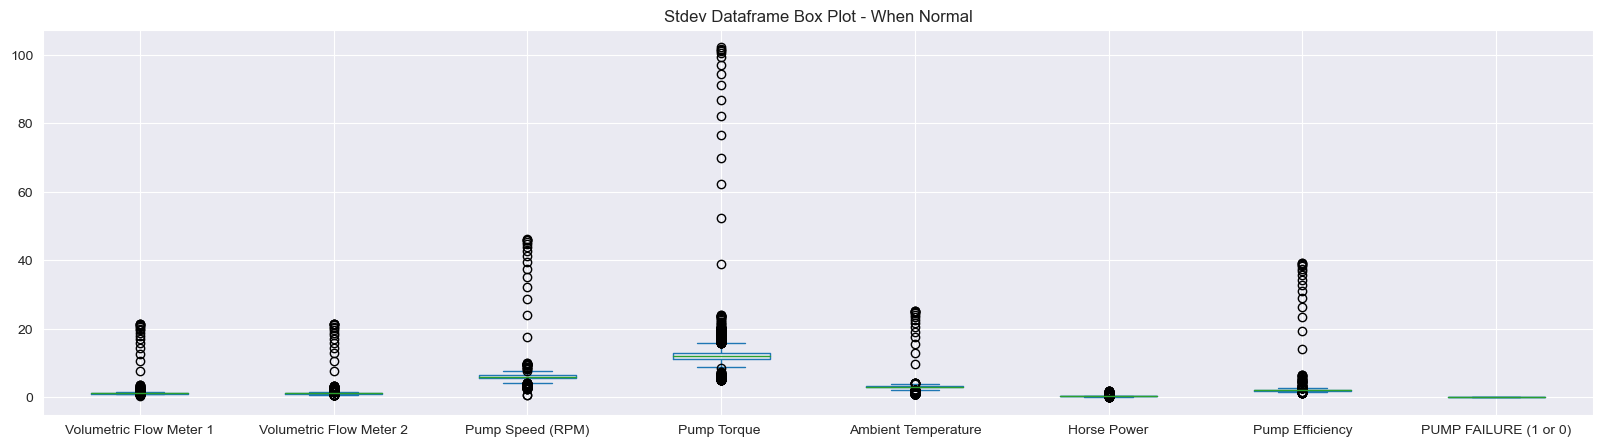

In [72]:
# when normal
dataframe_0_stdev.plot(kind='box')
plt.title("Stdev Dataframe Box Plot - When Normal")
plt.show()

<span style="color:blue"> - We have a clearly look when the pump has failed for both dataset.

---------------------------------------------------------------------------

### Step 5: <span style="color:green">Create Quartiles</span> 

Create two new variables called Q1 and Q3 using the dataframe_raw dataset. 

i)  <b> Q1 contains the 25th percentile for all columns in the DataFrame. Q3 contains the 75th percentile  for all the columns in the DataFrame.</b>

ii) After defining Q1 and Q3, we will calculate the interquartile range **(IQR = Q3 - Q1)** for all columns in the DataFrame and print it to the screen.

In [74]:
# remove 2 object columns
columns_to_drop =["Data Source","TIMEFRAME (DD/MM/YYYY)"]
dataframe_raw_new = dataframe_raw.drop(columns = columns_to_drop)

Q1 = dataframe_raw_new.quantile(0.25)
Q3 = dataframe_raw_new.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Volumetric Flow Meter 1     2.09
Volumetric Flow Meter 2     2.13
Pump Speed (RPM)           12.00
Pump Torque                24.00
Ambient Temperature         5.00
Horse Power                 0.56
Pump Efficiency             3.91
PUMP FAILURE (1 or 0)       0.00
dtype: float64


---------------------------------------------------------------------------

### Step 6: <span style="color:green">Identify Outliers</span> 

<b> Outlier = Q1 - 1.5x IQR OR Q3 + 1.5x IQR </b>
    

In [75]:
Lower_Limit = Q1 - 1.5 * IQR
Upper_Limit = Q3 + 1.5 * IQR

outliers = dataframe_raw_new[ ((dataframe_raw_new < Lower_Limit) | ((dataframe_raw_new > Upper_Limit))).any(axis=1) ]


In [76]:
# Dataframe with no outliers
no_outliers = dataframe_raw_new[~ ((dataframe_raw_new < Lower_Limit) | ((dataframe_raw_new > Upper_Limit))).any(axis=1)]


In [77]:
# percentage of data that remains (Number of entries left after outlier removal / Number of total entries in dataset) 
proportion_of_outliers = len(no_outliers) / len(outliers)
print(proportion_of_outliers)

24.821052631578947


---------------------------------------------------------------------------

### Step 7: <span style="color:green">Create a box plot without outliers</span> 
We want to remove *all* the outliers in your dataset and create box plots to see how the data looks without outliers.


<span style="color:blue"> - Raw DataFrame box plot when failed reveals nothing to plot. Since when we print dataframe with outliers removed when the pump has failed, the data frame is empty.

/var/folders/w2/pc6gxh690zvgs97d_27ffx1h0000gn/T/ipykernel_3402/4290158469.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_outliers_1_raw = no_outliers[failling_raw]
/var/folders/w2/pc6gxh690zvgs97d_27ffx1h0000gn/T/ipykernel_3402/4290158469.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_outliers_0_raw = no_outliers[normal_raw]


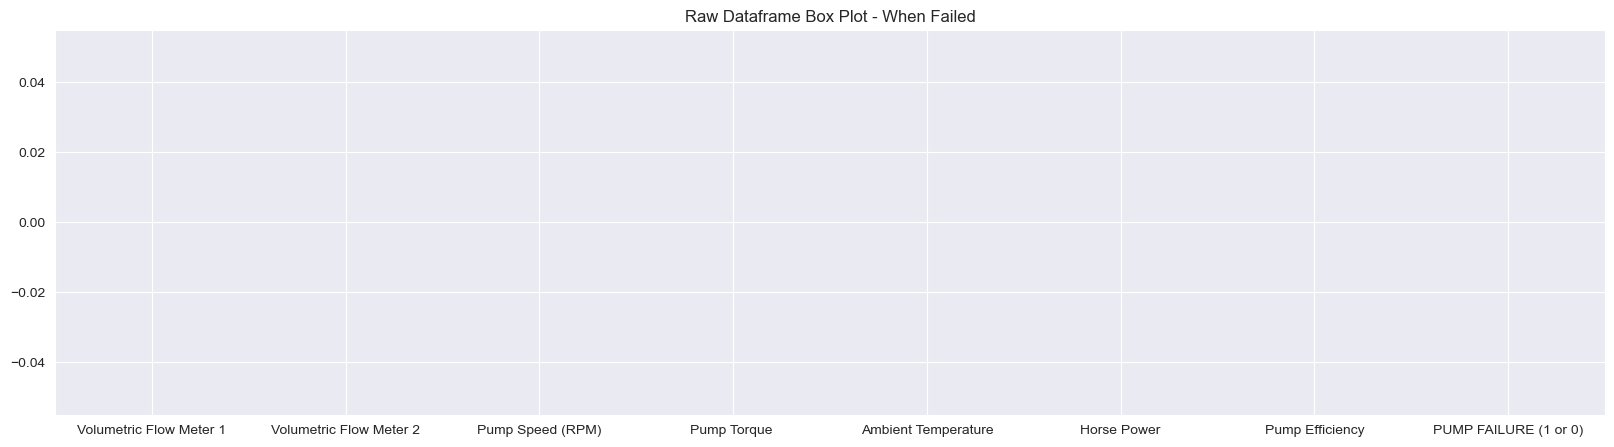

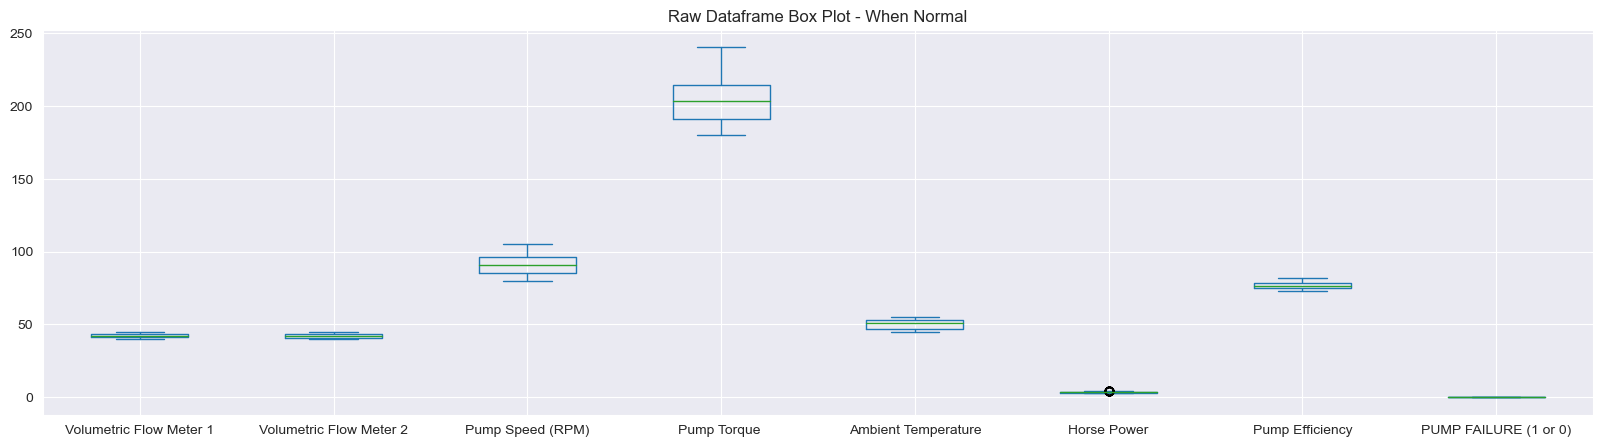

In [79]:
failling_raw_no_outliers = no_outliers['PUMP FAILURE (1 or 0)']== 1
normal_raw_no_outliers = no_outliers['PUMP FAILURE (1 or 0)']== 0
no_outliers_1_raw = no_outliers[failling_raw]
no_outliers_0_raw = no_outliers[normal_raw]

# A boxplot when PUMP FAILURE is 1 (Failure)
no_outliers_1_raw.plot(kind='box')
plt.title("Raw Dataframe Box Plot - When Failed")
plt.show()

# A boxplot when PUMP FAILURE is 0 (Normal Behaviour)
no_outliers_0_raw.plot(kind='box')
plt.title("Raw Dataframe Box Plot - When Normal")
plt.show()

---------------------------------------------------------------------------

### Step 8: <span style="color:green">Plot and Examine Each Column</span> 

As we might recall from the earlier plot we had made with the line plot; it was hard to see which variables were the most significant with respect to pump failure when all the variables are plotted together. This is common when variables are at different scales, the trends can be more challenging to interpret. This is why we are going to ITERATE through the DataFrame, plot each individual variable out, and compare this with the Pump Failure for a more streamlined analysis.


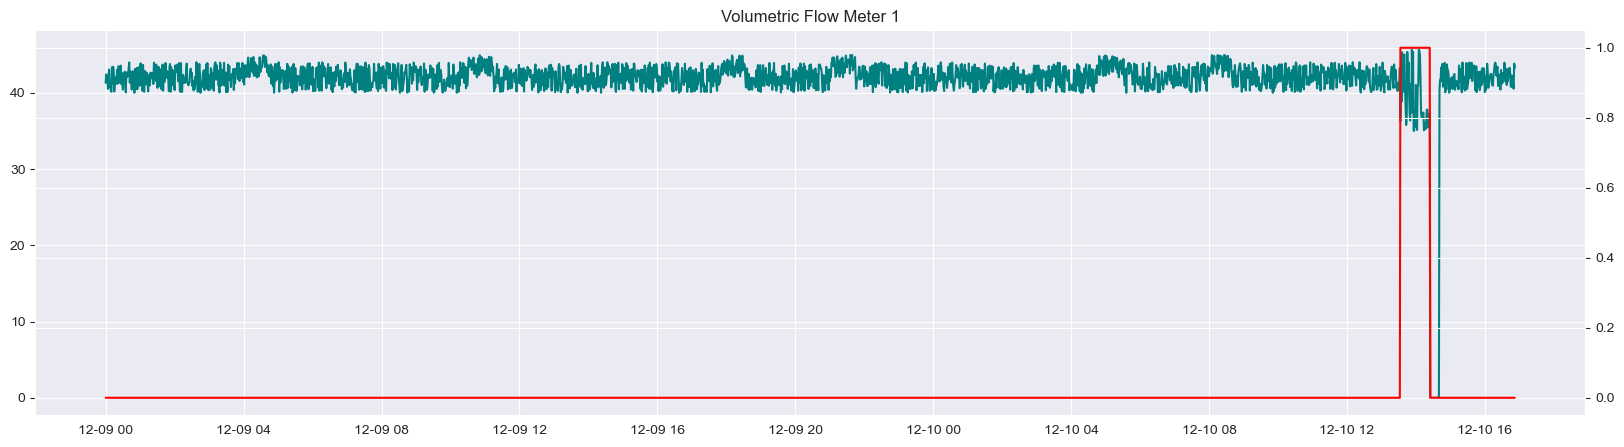

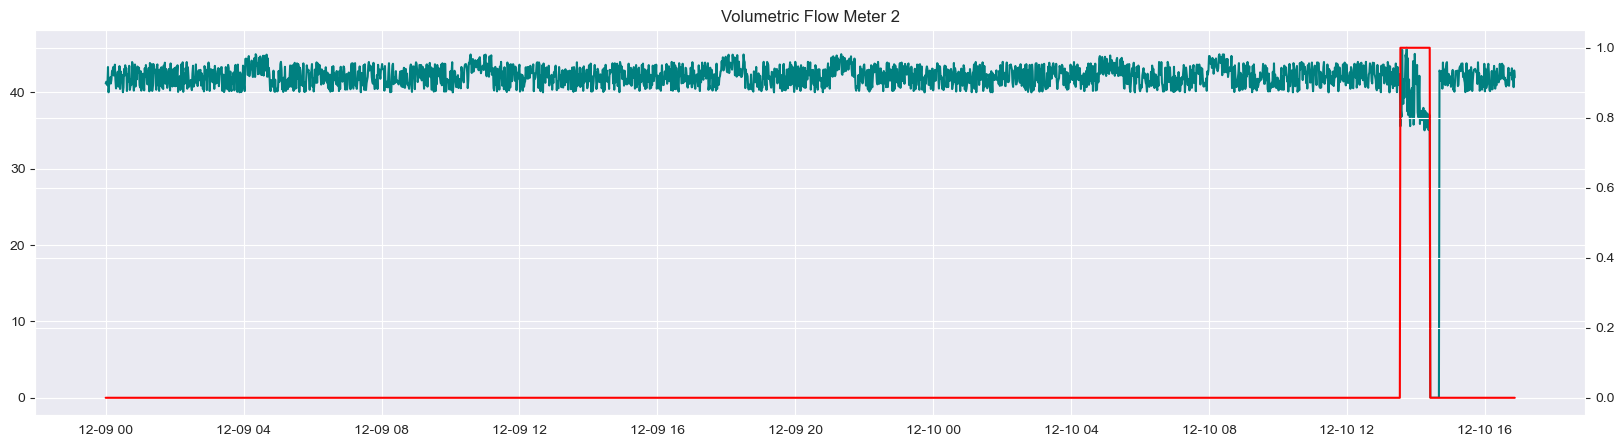

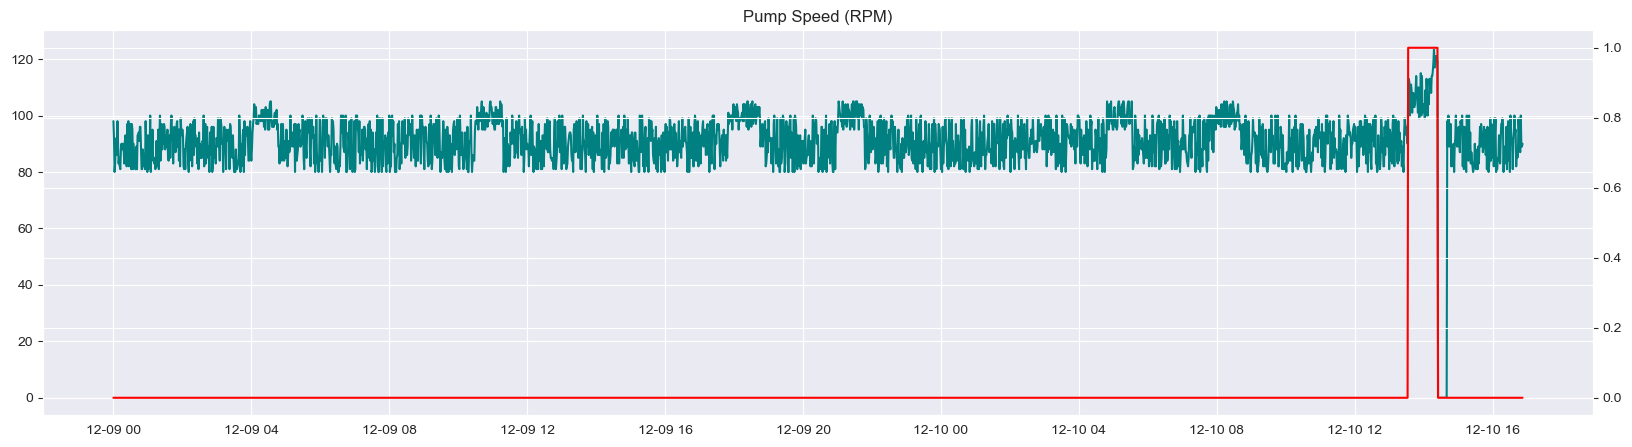

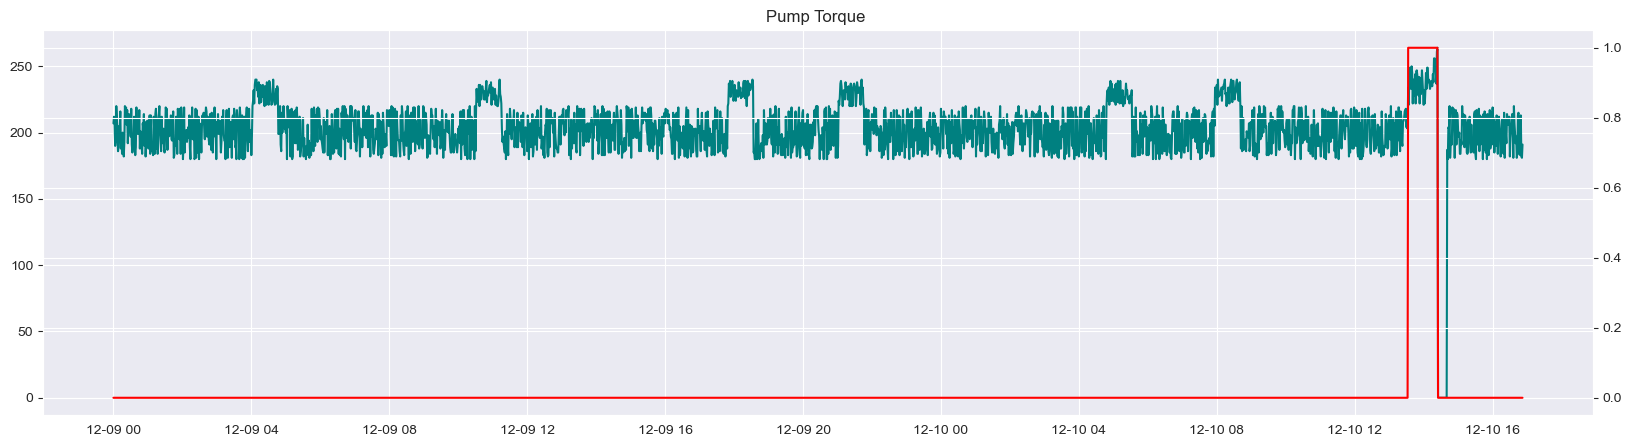

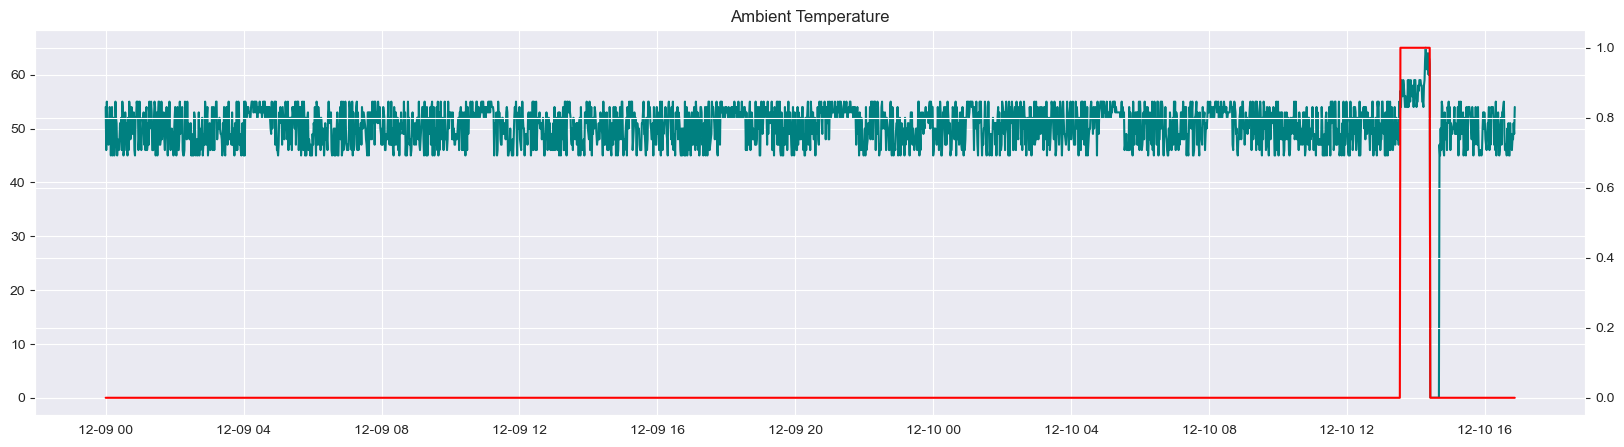

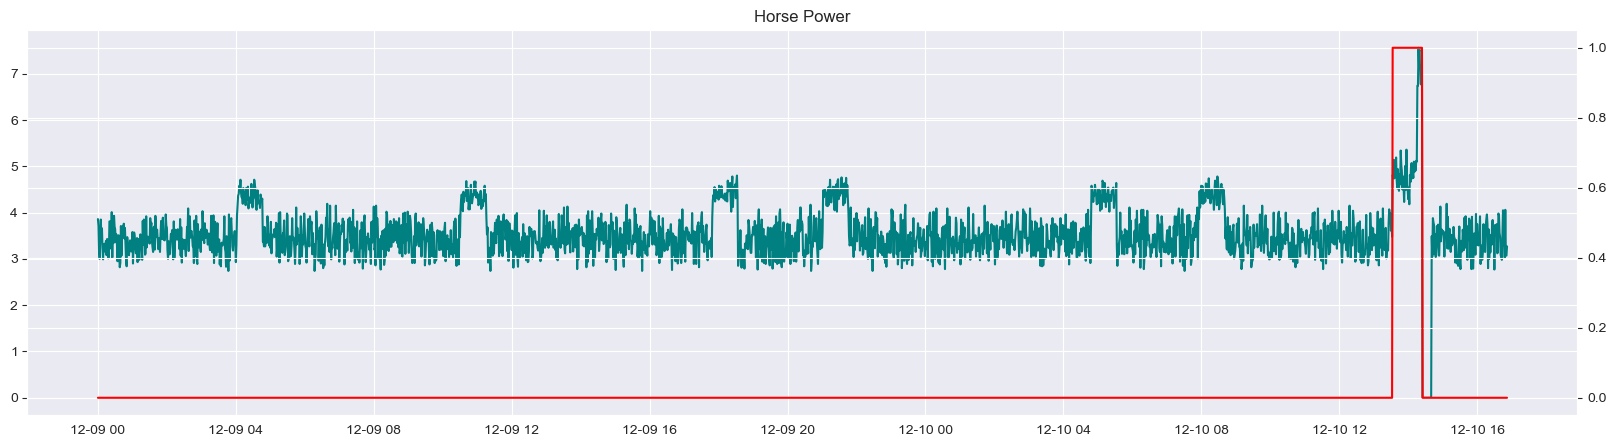

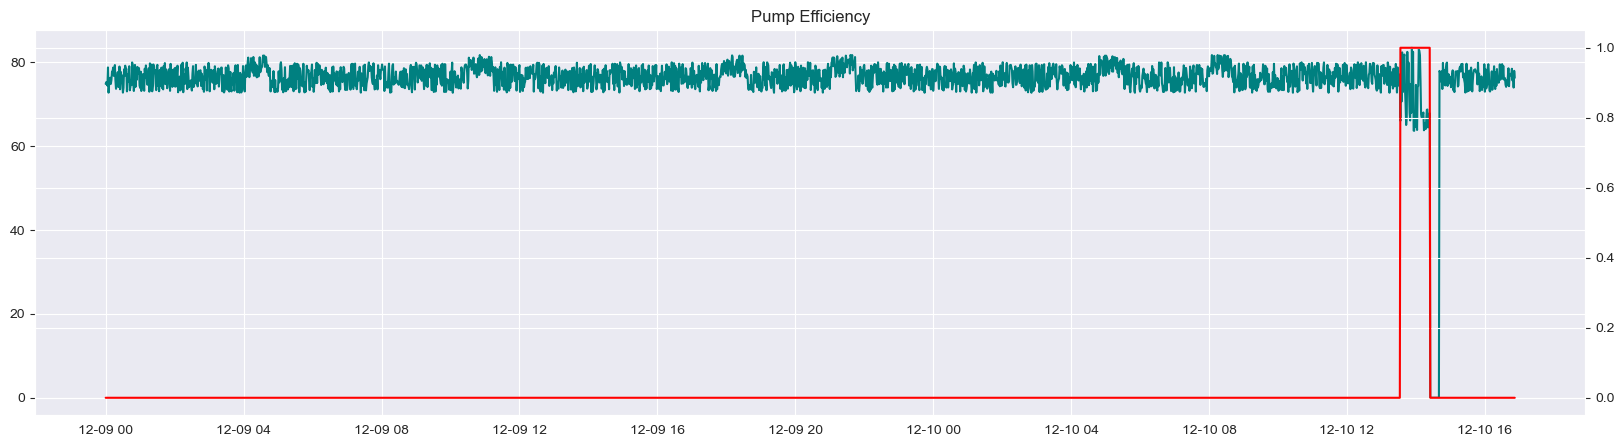

In [80]:
# Convert 'TIMEFRAME (DD/MM/YYYY)' to datetime 
dataframe_raw['TIMEFRAME (DD/MM/YYYY)'] = pd.to_datetime(dataframe_raw['TIMEFRAME (DD/MM/YYYY)'], format='%d/%m/%Y %H:%M')


ListOfVariables = [
    'Volumetric Flow Meter 1',
    'Volumetric Flow Meter 2',
    'Pump Speed (RPM)',
    'Pump Torque ',
    'Ambient Temperature',
    'Horse Power',
    'Pump Efficiency'
]
   
# loop through the dataframe_raw dataset, plotting every variable individually, against the Pump Failure to better identify trends.
    
for item in ListOfVariables:
    # Create a figure and set up the first axis
    fig, first_axis = plt.subplots()
    
    # Plot the data on the first axis
    first_axis.plot(dataframe_raw['TIMEFRAME (DD/MM/YYYY)'], dataframe_raw[item], label=item, color='teal')
    
    # Create the second axis and plot 'PUMP FAILURE (1 or 0)'
    second_axis = first_axis.twinx()
    second_axis.plot(dataframe_raw['TIMEFRAME (DD/MM/YYYY)'], dataframe_raw['PUMP FAILURE (1 or 0)'], label='PUMP FAILURE (1 or 0)', color='red')
    

    plt.title(item)
    
    # Show the plot
    plt.show()

In [81]:
dataframe_raw.head()

,Data Source,TIMEFRAME (DD/MM/YYYY),Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
0,Raw,2014-12-09 00:00:00,41.30,41.16,98,207,54,3.86,74.84,0
1,Raw,2014-12-09 00:01:00,42.40,41.39,92,212,46,3.71,75.25,0
2,Raw,2014-12-09 00:02:00,41.43,41.15,80,207,55,3.15,74.82,0
3,Raw,2014-12-09 00:03:00,42.21,40.93,83,190,49,3.00,74.42,0
4,Raw,2014-12-09 00:04:00,40.51,43.32,90,195,50,3.34,78.76,0


<span style="color:blue"> - We can see there is a spike in every plots. Horse Power might be reacting more strongly to the Pump Failure than others.

---

### Step 9: <span style="color:green">Create a Plot for Pump Failures Over a Rolling Time Period</span> 

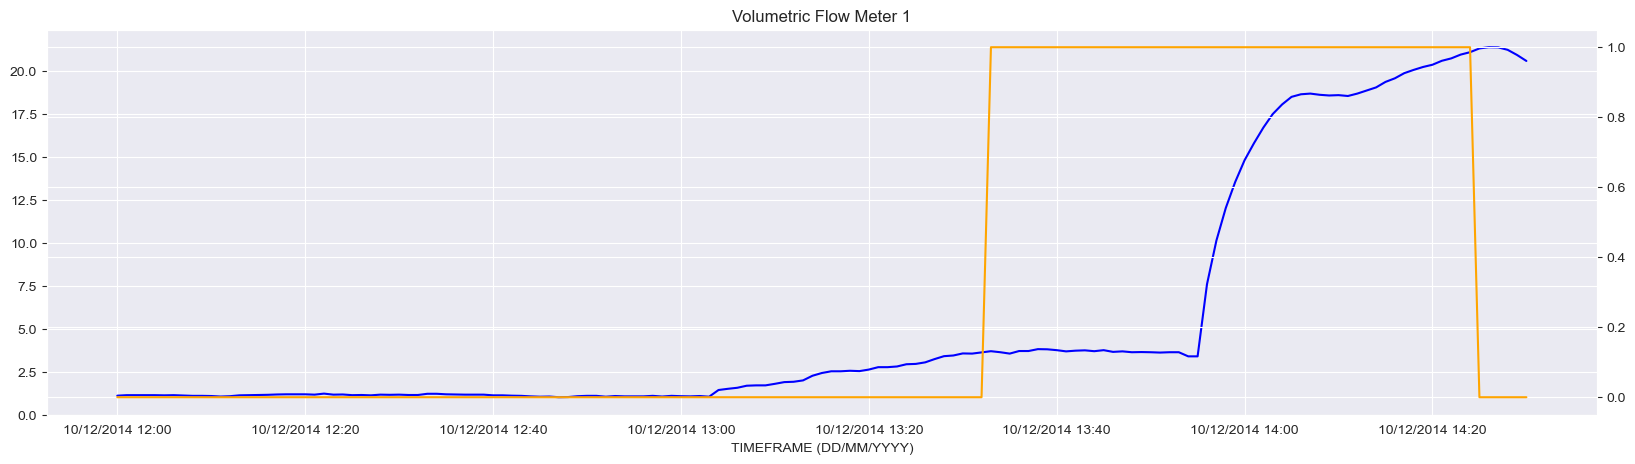

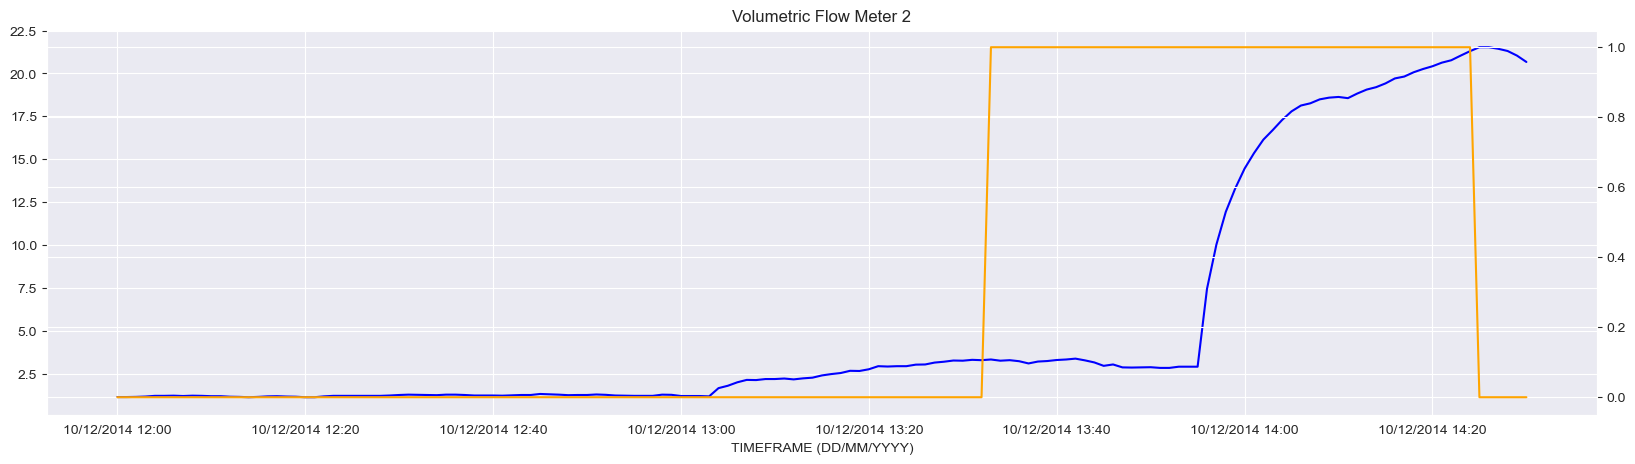

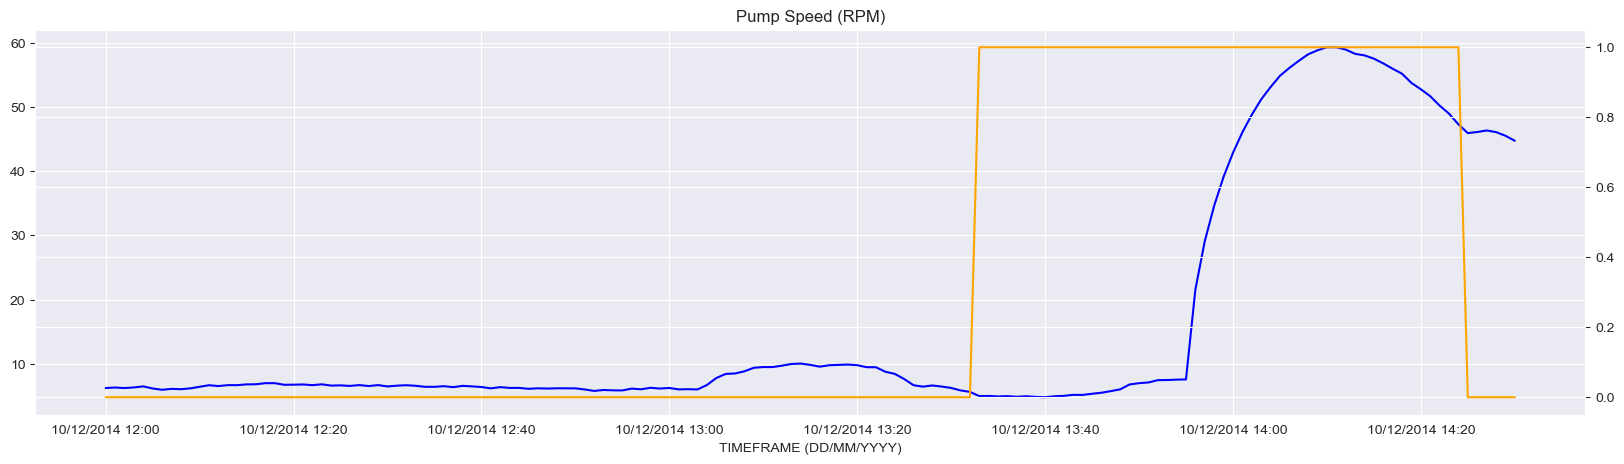

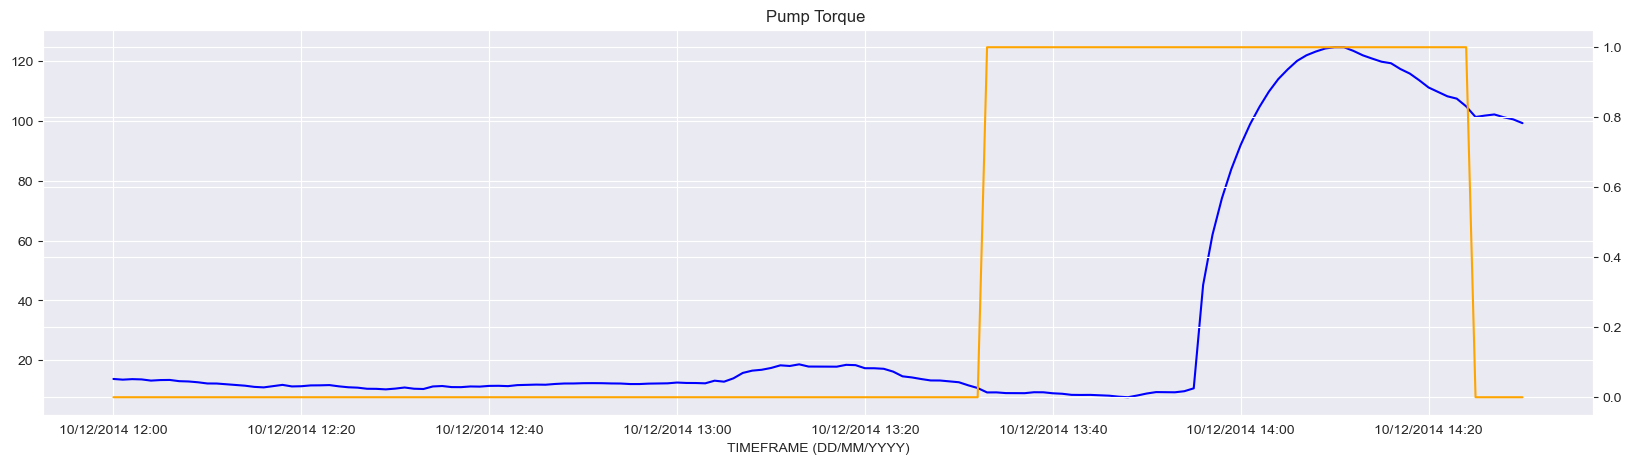

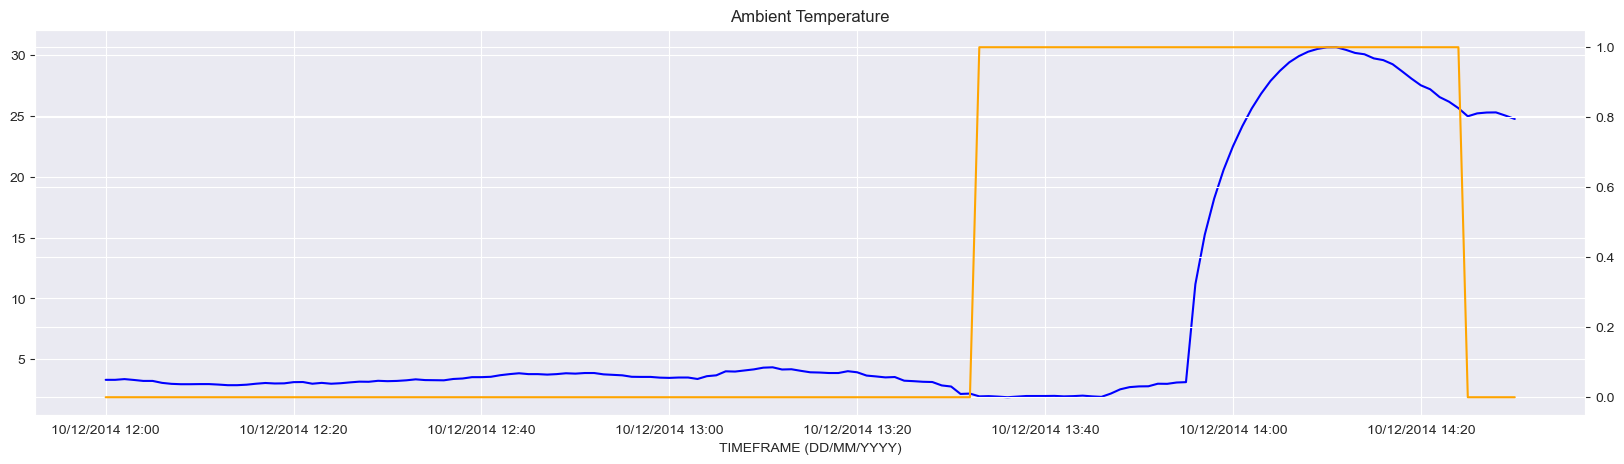

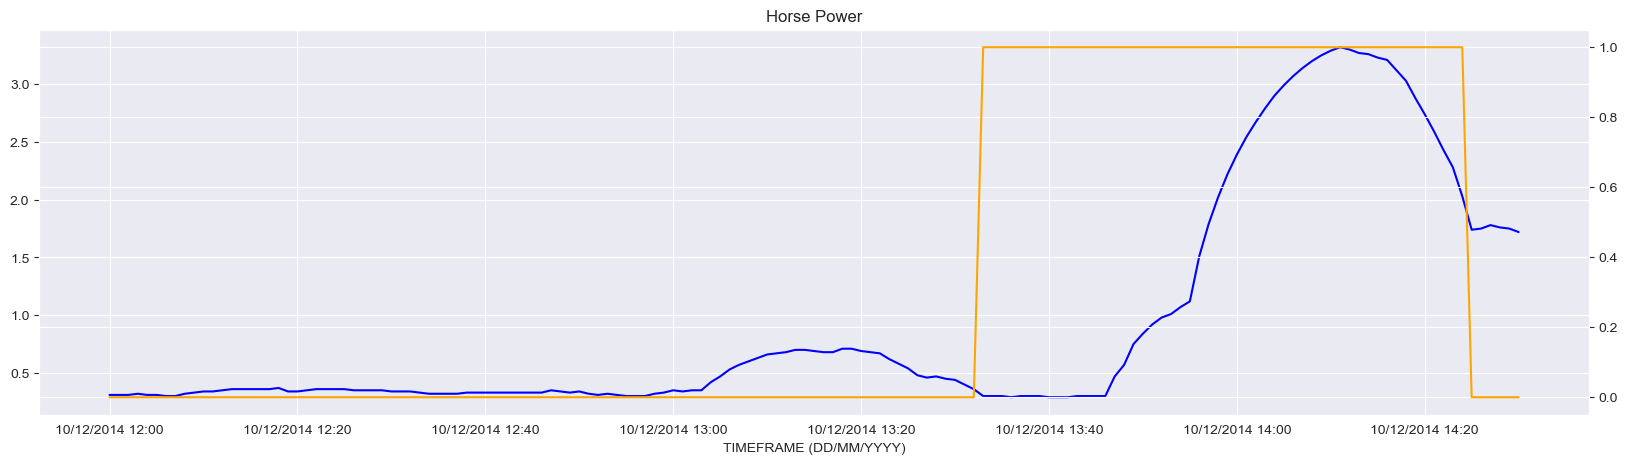

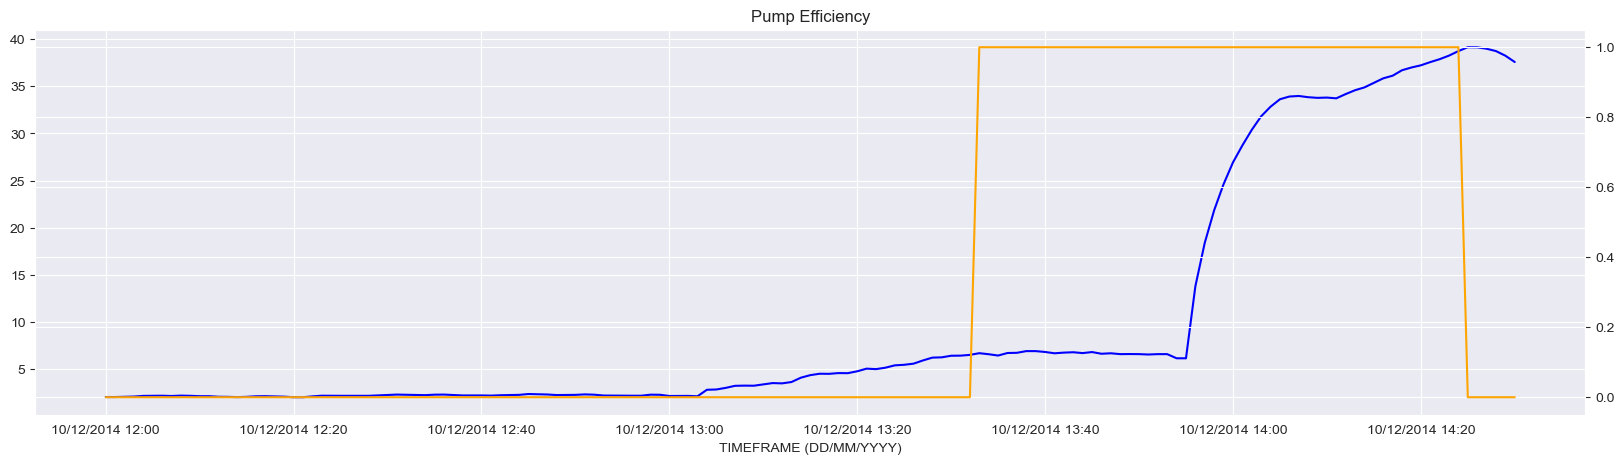

In [32]:
# set the index

dataframe_stdev.set_index(dataframe_stdev.loc[:, 'TIMEFRAME (DD/MM/YYYY)'], inplace=True)

# Define the time period: 10/12/2014 12:00 to 10/12/2014 14:30
start_time = "10/12/2014 12:00"
end_time = "10/12/2014 14:30"

# Filter the dataframe for the specified time period
dataframe_stdev_filtered = dataframe_stdev[(dataframe_stdev.index >= start_time) & (dataframe_stdev.index <= end_time)]

# Plot for the specified time period
for item in ListOfVariables:
    # Plot the data on the first axis
    first_axis = dataframe_stdev_filtered[item].plot(color='blue')

    # Set major locator for the x-axis
    first_axis.xaxis.set_major_locator(plt.MaxNLocator(10))  # only plot a maximum of 10 Time Stamps
    
    # Create the second axis and plot 'PUMP FAILURE (1 or 0)'
    second_axis = first_axis.twinx()
    second_axis.plot(dataframe_stdev_filtered['PUMP FAILURE (1 or 0)'], color='orange')
    second_axis.xaxis.set_major_locator(plt.MaxNLocator(10))  # only plot a maximum of 10 Time Stamps
    
    plt.title(item)

    # Show the plot
    plt.show()

---

## Part II: <span style="color:blue">Inferential Statistical Analysis</span>

We will create a heatmap using the correlation function. The heatmap showed the attributes that strongly correlated to Pump Failure. 

### Step 10: <span style="color:purple">Create a Heatmap</span> 
Using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (R) for all variables using the dataframe_raw dataset.

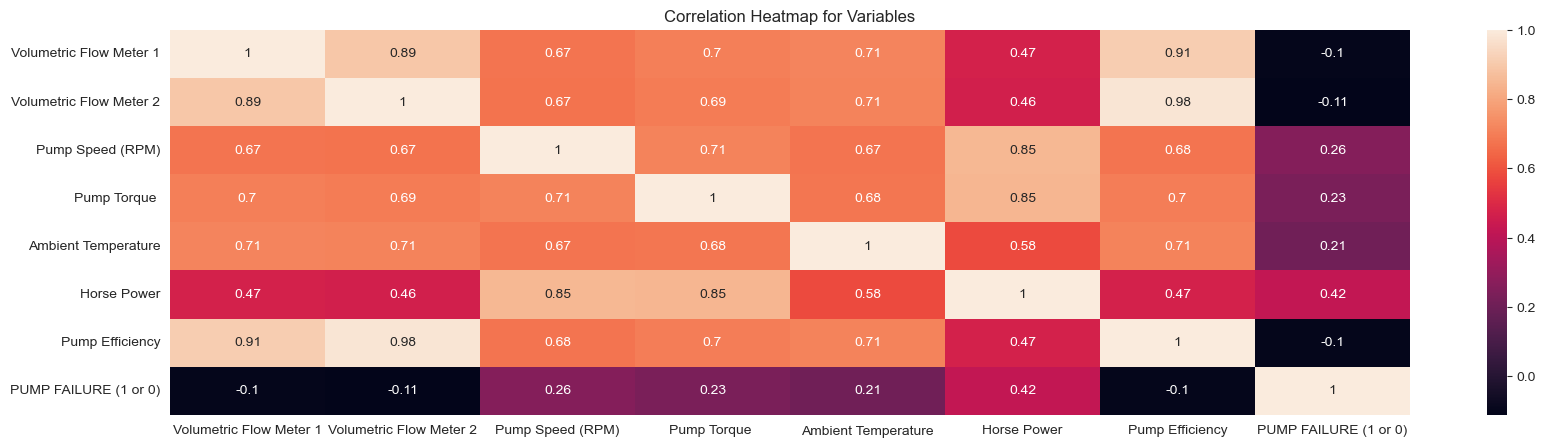

In [82]:
# dataframe with numeric columns (drop "Data Source" & "TIME DATE")
correlation_data = dataframe_raw_new.corr()

# Create a heatmap
sns.heatmap(correlation_data, annot=True)

# Set the title
plt.title('Correlation Heatmap for Variables')

# Show the plot
plt.show()

<span style="color:blue"> - Pump Speed (RPM), Pump Torque, Ambient Temperature and Horse Power correlate with Pump Failure.

---


### Step 11: <span style="color:purple">Create a Barplot of Correlated Features</span>
<b> Using the correlated DataFrame created earlier, create a barplot that shows the correlated features against PUMP FAILURE (1 or 0), in descending order. </b>


In [83]:
# correlation_data = dataframe_raw_new.corr() (From above)

correlation_data

,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
Volumetric Flow Meter 1,1.000000,0.893058,0.674691,0.700425,0.713913,0.470081,0.913014,-0.102508
Volumetric Flow Meter 2,0.893058,1.000000,0.671896,0.692183,0.710423,0.462087,0.980144,-0.112115
Pump Speed (RPM),0.674691,0.671896,1.000000,0.711037,0.674645,0.848416,0.677924,0.260016
Pump Torque,0.700425,0.692183,0.711037,1.000000,0.680159,0.847884,0.698527,0.233193
Ambient Temperature,0.713913,0.710423,0.674645,0.680159,1.000000,0.579374,0.712727,0.207946
Horse Power,0.470081,0.462087,0.848416,0.847884,0.579374,1.000000,0.471731,0.421694
Pump Efficiency,0.913014,0.980144,0.677924,0.698527,0.712727,0.471731,1.000000,-0.102696
PUMP FAILURE (1 or 0),-0.102508,-0.112115,0.260016,0.233193,0.207946,0.421694,-0.102696,1.000000


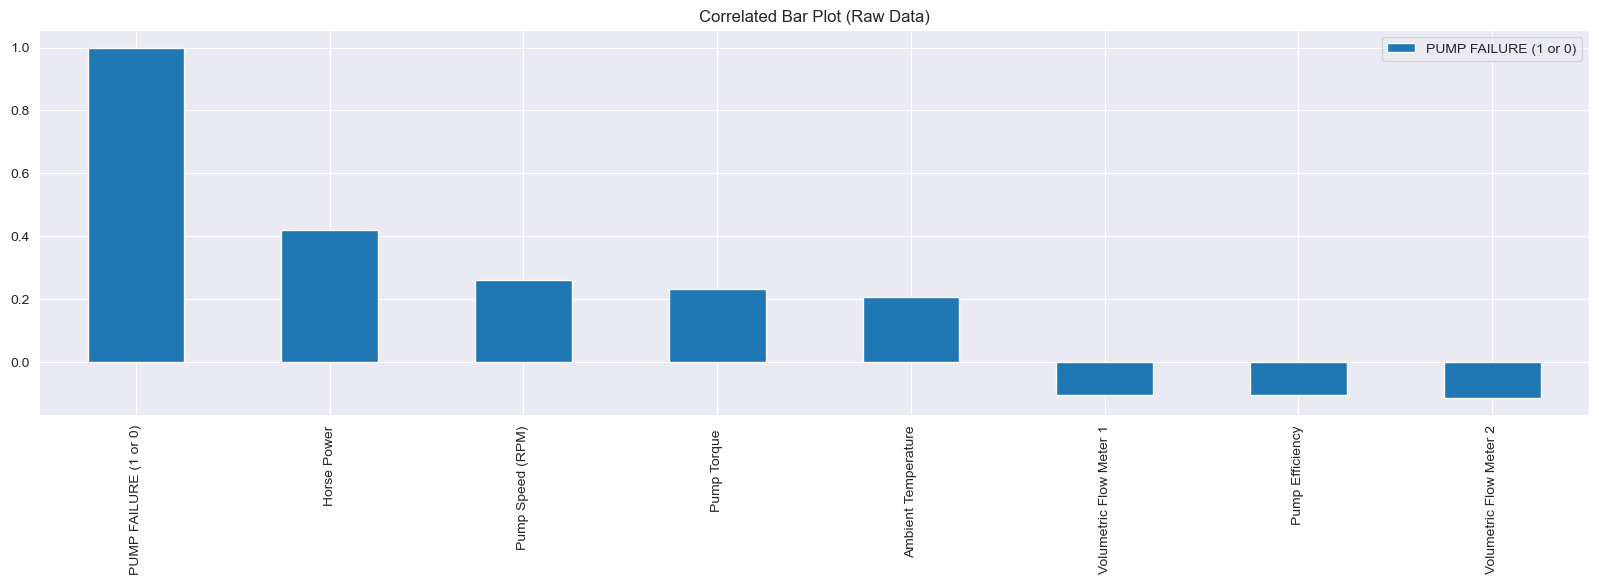

In [84]:
sorted_data = correlation_data.sort_values(by='PUMP FAILURE (1 or 0)',ascending=False)
sorted_data.plot(y='PUMP FAILURE (1 or 0)',kind='bar')

plt.title('Correlated Bar Plot (Raw Data)')
plt.show()

---

### Step 12: <span style="color:purple">Create a Rolling Standard Deviation Heatmap</span> 
<b> Using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (including R) for all variables using the dataframe_stdev dataset. </b>


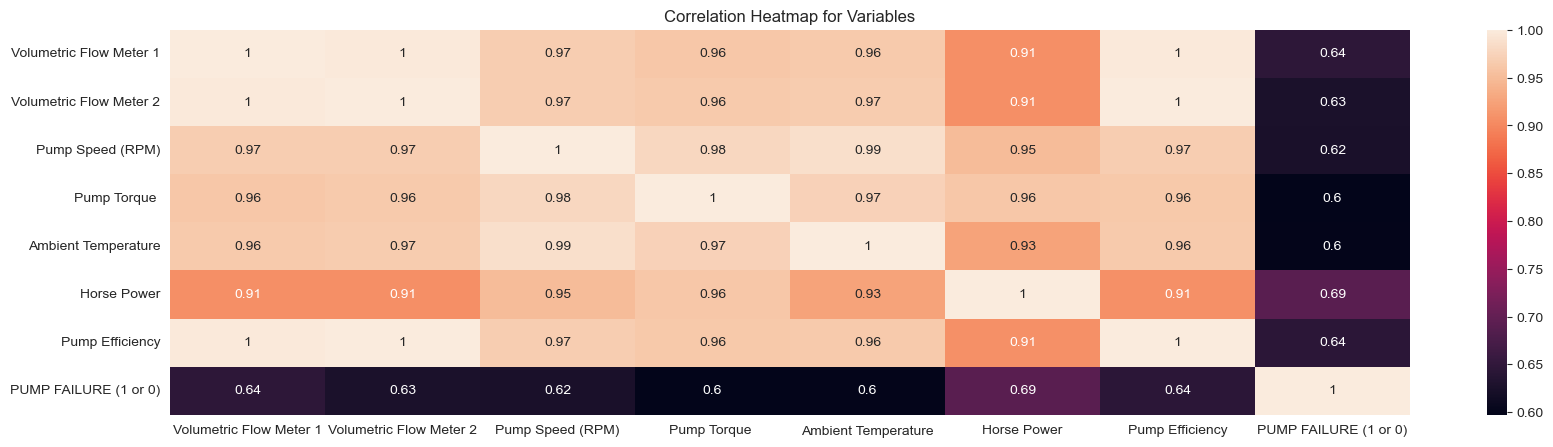

In [85]:
# dataframe with numeric columns (drop "Data Source" & "TIME DATE")
dataframe_stdev_new = dataframe_stdev.drop(columns = columns_to_drop)

correlation_stdev_data = dataframe_stdev_new.corr()

# Create a heatmap
sns.heatmap(correlation_stdev_data, annot=True)

# Set the title
plt.title('Correlation Heatmap for Variables')

# Show the plot
plt.show()

<span style="color:blue"> - Volumetric Flow Meter 1,Volumetric Flow Meter 2, Pump Speed (RPM), Pump Torque, Ambient Temperature and Horse Power correlate with Pump Failure. Horse Power has the strongest positive correlation with Pump Failure.

---

### Step 13: <span style="color:purple">Use Ordinary Least Squares Regression (OLS) </span> 
to create a multivariate regression model (which is a linear regression model with more than one independent variable). 

<b> i) Using the OLS Regression Model in the statsmodel.api library, create a regression equation that models the Pump Failure (Y-Variable) against all independent variables in the dataframe_raw dataset. </b>

<b> ii) Repeat i) but this time use the dataframe_stdev you imported previously.</b>


In [14]:
#Dataframe_Raw
# Dataframe for Independent and dependent variables.
independent_variables_raw = dataframe_raw_new.drop(columns="PUMP FAILURE (1 or 0)")
dependent_variable_raw = dataframe_raw_new['PUMP FAILURE (1 or 0)']

# Add constant to independent variable.
independent_variables_raw = sm.add_constant(independent_variables_raw)

# Store and Fit your model
regression_model_raw = sm.OLS(dependent_variable_raw,independent_variables_raw).fit() 

# Print
print(regression_model_raw.summary())

                              OLS Regression Results                             
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.362
Model:                               OLS   Adj. R-squared:                  0.360
Method:                    Least Squares   F-statistic:                     197.9
Date:                   Thu, 25 Jan 2024   Prob (F-statistic):          5.58e-233
Time:                           16:46:02   Log-Likelihood:                 1823.0
No. Observations:                   2453   AIC:                            -3630.
Df Residuals:                       2445   BIC:                            -3583.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [55]:
#Dataframe_Stdev
# Dataframe for Independent and dependent variables.
independent_variables_stdev = dataframe_stdev_new.drop(columns="PUMP FAILURE (1 or 0)")
dependent_variable_stdev = dataframe_stdev_new['PUMP FAILURE (1 or 0)']

# Add constant to independent variable.
independent_variables_stdev = sm.add_constant(independent_variables_stdev)

# Store and Fit your model
regression_model_stdev = sm.OLS(dependent_variable_stdev,independent_variables_stdev).fit() 


# Print
print(regression_model_stdev.summary())

                              OLS Regression Results                             
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.778
Model:                               OLS   Adj. R-squared:                  0.778
Method:                    Least Squares   F-statistic:                     1225.
Date:                   Thu, 25 Jan 2024   Prob (F-statistic):               0.00
Time:                           17:10:57   Log-Likelihood:                 3117.4
No. Observations:                   2452   AIC:                            -6219.
Df Residuals:                       2444   BIC:                            -6172.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

 <span style="color:blue"> - R squared for dataframe_raw is 0.362, smaller than R squared for dataframe_stdev is 0.778. This explains a good fit, R squared indicates a large proportion of the variability. 

---

### Step 14: <span style="color:purple">Analysis of Coefficients </span>

We identified that *one* regressive model has a better fit than the previous model.

Using this model, we want to **extract** the co-efficients to better understand the variables that display the largest *absolute* rate of change with respect to Pump Failure. We'll use the co-efficients to better assess this from an *absolute* rate of change perspective. (i.e. Which variables spike the most in relation to Pump Failure?)

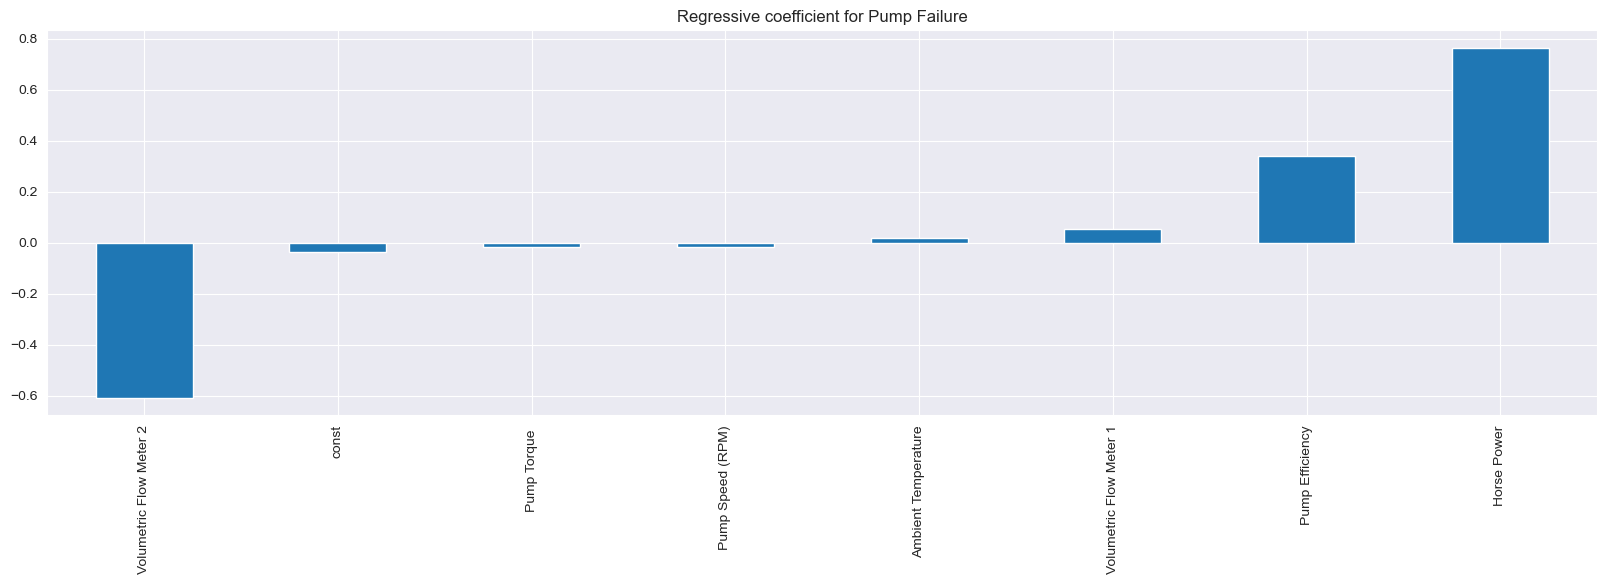

In [44]:
coefficients = regression_model_stdev.params
sorted_coefficients = coefficients.sort_values(ascending=True)
sorted_coefficients.plot(kind='bar')
plt.title('Regressive coefficient for Pump Failure')
plt.show()

---


### Step 15: <span style="color:purple">Validate Predictions</span>    

In [45]:
dataframe_stdev.head()

,Data Source,TIMEFRAME (DD/MM/YYYY),Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
0,Rolling Stdev (30 Minute),9/12/2014 0:00,1.04,0.96,5.54,11.70,3.40,0.32,1.74,0
1,Rolling Stdev (30 Minute),9/12/2014 0:01,1.06,1.01,5.49,11.73,3.36,0.31,1.83,0
2,Rolling Stdev (30 Minute),9/12/2014 0:02,1.06,1.03,5.62,11.94,3.40,0.31,1.87,0
3,Rolling Stdev (30 Minute),9/12/2014 0:03,1.06,1.05,5.61,12.10,3.30,0.31,1.90,0
4,Rolling Stdev (30 Minute),9/12/2014 0:04,1.07,1.03,5.61,12.31,3.36,0.30,1.88,0


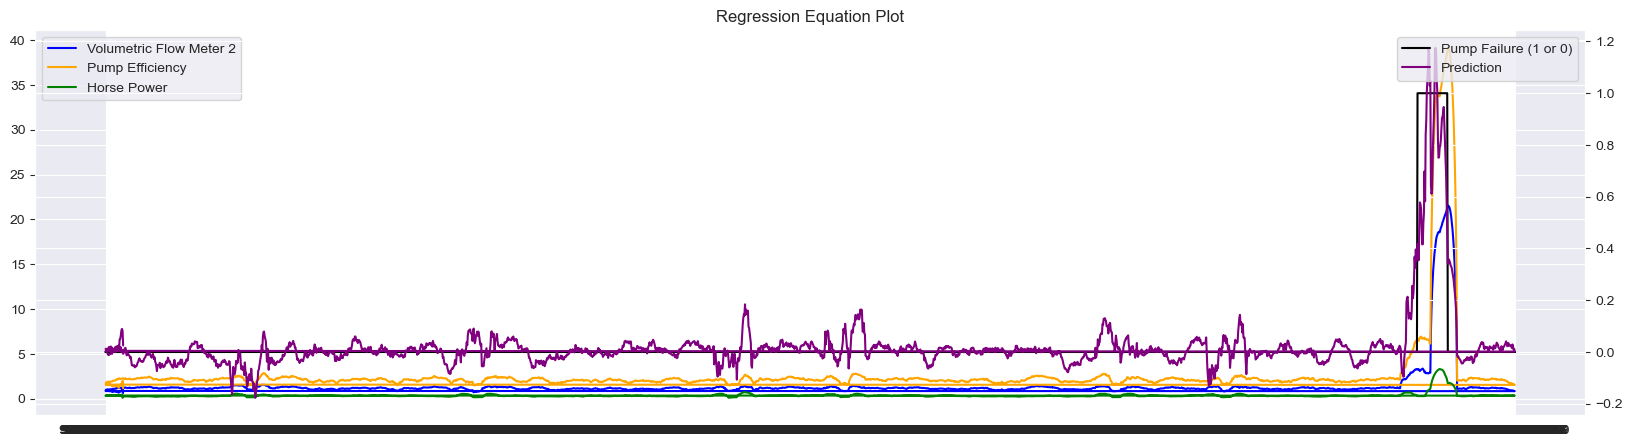

In [35]:
# i) Create a new column in the dataframe_stdev, called, 'Prediction'.
dataframe_stdev['TIMEFRAME (DD/MM/YYYY)'] = pd.to_datetime(dataframe_stdev['TIMEFRAME (DD/MM/YYYY)'], format='%d/%m/%Y %H:%M')

# Use the regression equation we created in the previous step and apply the .predict() function to the independent variables in the dataframe_stdev dataset so we get a column full of your regressive predictions.
dataframe_stdev['Prediction']= regression_model_stdev.predict(independent_variables_stdev)

# ii) Create a Dual-Axis Plot
fig, ax1=plt.subplots()
ax1.plot(dataframe_stdev['Volumetric Flow Meter 2'], label='Volumetric Flow Meter 2', color='blue')
ax1.plot(dataframe_stdev['Pump Efficiency'], label='Pump Efficiency',color='orange')
ax1.plot(dataframe_stdev['Horse Power'], label='Horse Power', color='green')

ax2 = ax1.twinx()
ax2.plot(dataframe_stdev['PUMP FAILURE (1 or 0)'], label='Pump Failure (1 or 0)', color='black')
ax2.plot(dataframe_stdev['Prediction'], label='Prediction', color='purple')

# legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# show
plt.title('Regression Equation Plot')
plt.show()